In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression # , LassoRegression, RidgeRegression, ElasticNetRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.shape

(301, 9)

In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [8]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [9]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [11]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [12]:
df.isnull().sum() #no missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
df['Age'] =2020 - df['Year']

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [16]:
df['Age'].unique()

array([ 6,  7,  3,  9,  2,  5,  4, 11, 10,  8, 17, 12, 14, 15, 16, 13],
      dtype=int64)

In [17]:
final = df.drop(['Car_Name', 'Year'], axis =1)

In [18]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [19]:
#Method 1
final_df =  pd.get_dummies(final, drop_first = True)

In [20]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [21]:
#method 2
fuel = pd.get_dummies(final['Fuel_Type'], drop_first = True)
trans = pd.get_dummies(final['Transmission'], drop_first = True)
sell = pd.get_dummies(final['Seller_Type'], drop_first = True)

In [22]:
final.drop(['Fuel_Type','Transmission','Seller_Type' ], axis = 1, inplace = True)
final = pd.concat([final, fuel, trans, sell], axis = 1, )

In [23]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Diesel,Petrol,Manual,Individual
0,3.35,5.59,27000,0,6,0,1,1,0
1,4.75,9.54,43000,0,7,1,0,1,0
2,7.25,9.85,6900,0,3,0,1,1,0
3,2.85,4.15,5200,0,9,0,1,1,0
4,4.60,6.87,42450,0,6,1,0,1,0


In [24]:
final.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Diesel,Petrol,Manual,Individual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.367128,-0.550724
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.348715,-0.512030
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.162510,-0.101419
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,-0.050316,0.124269
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,-0.000394,0.039896
Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.098643,-0.350467
Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.091013,0.358321
Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,1.000000,0.063240
Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,0.063240,1.000000


<AxesSubplot:>

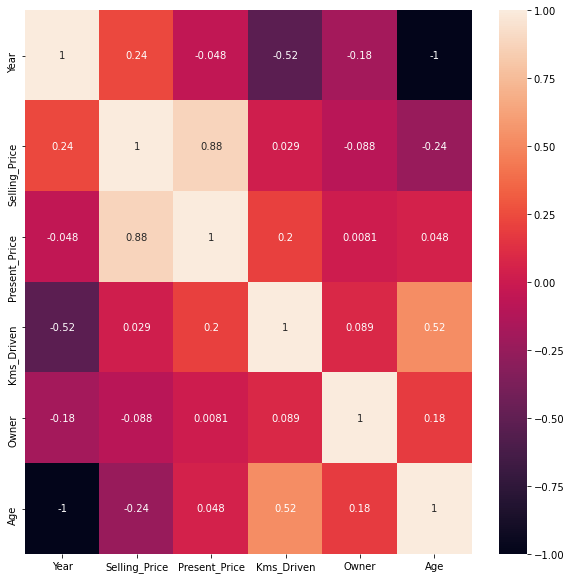

In [25]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

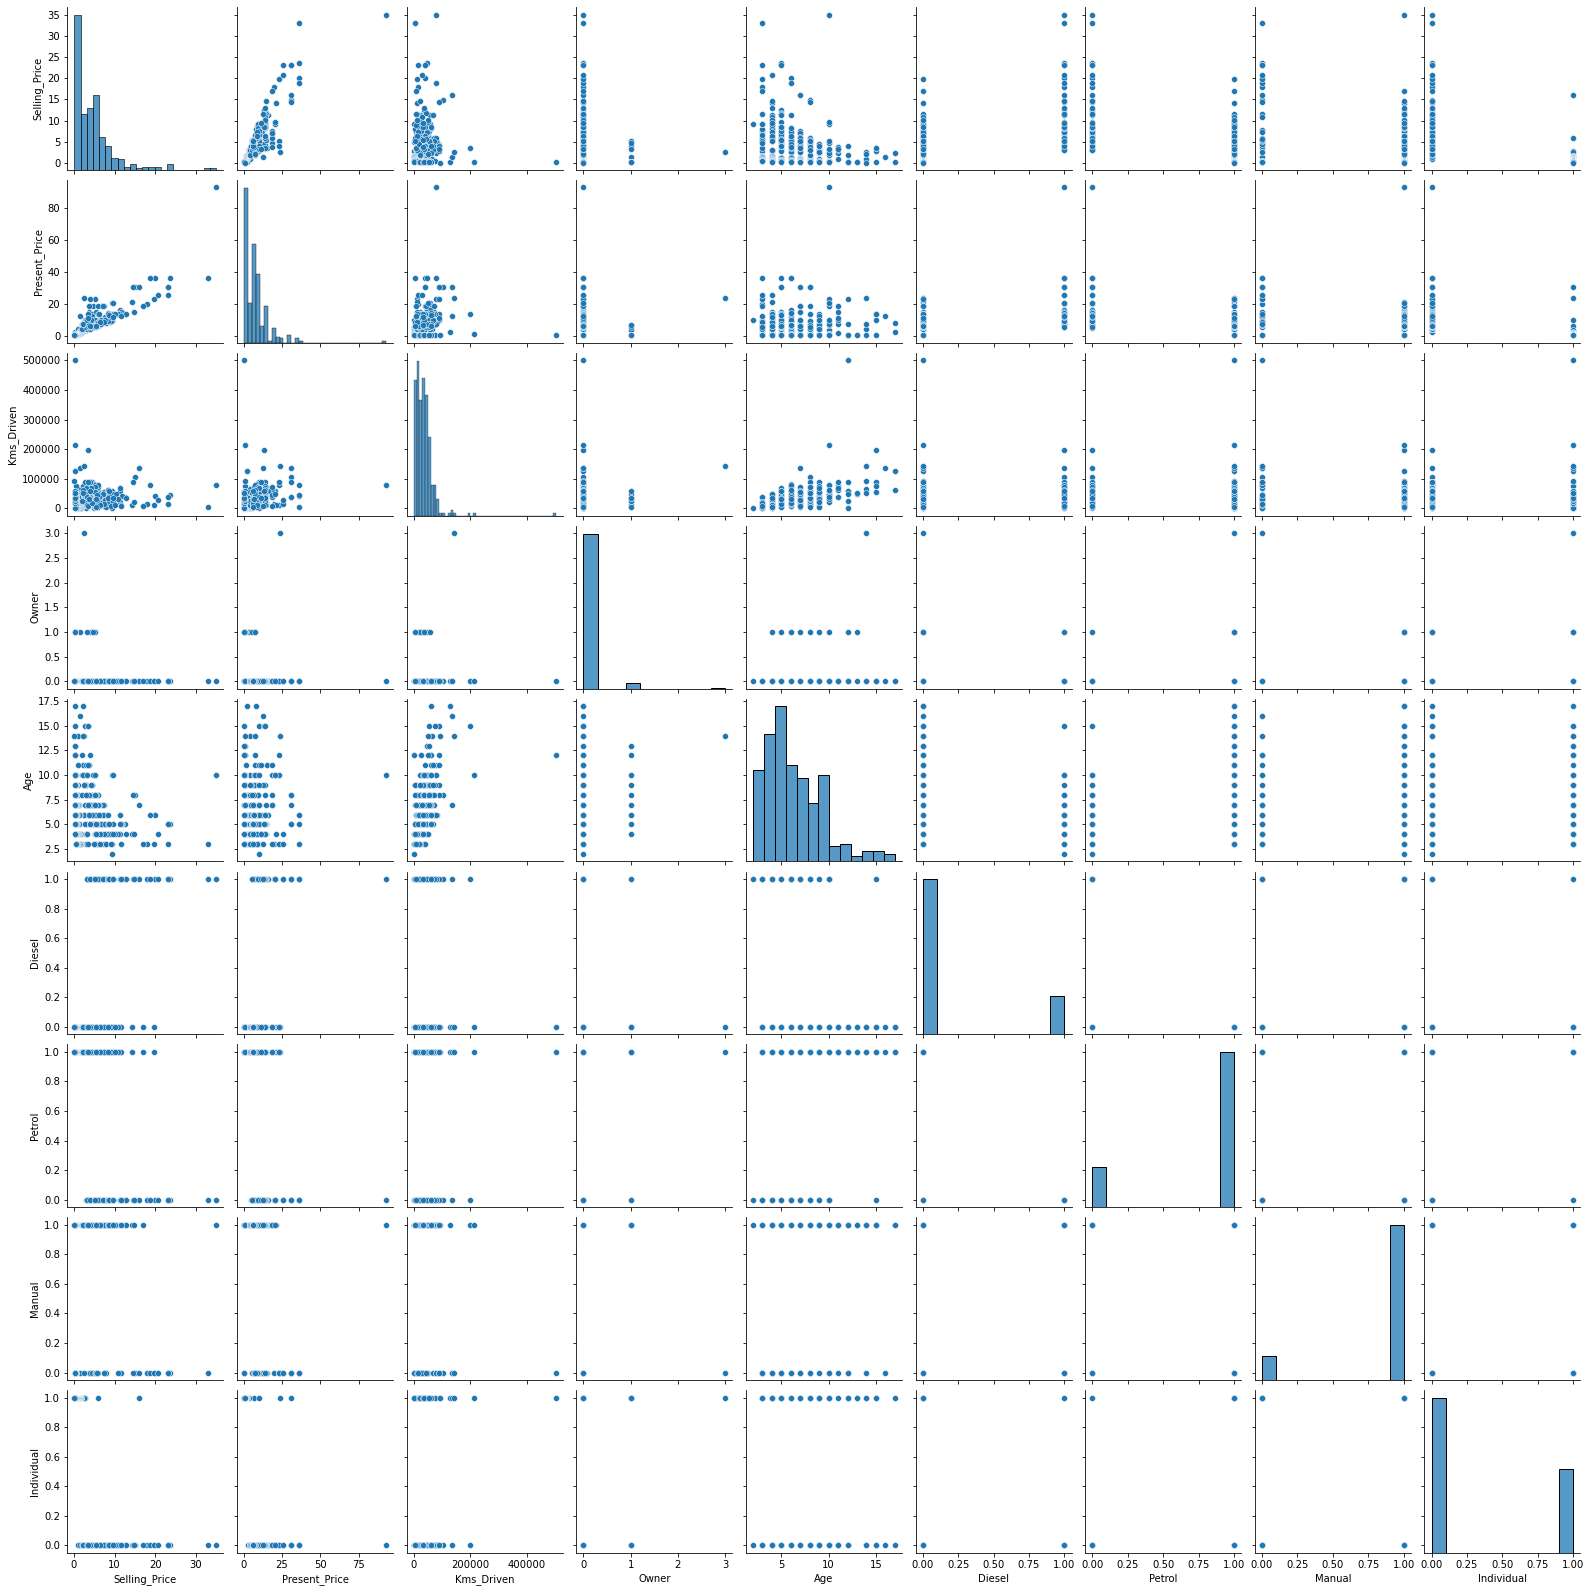

In [26]:
sns.pairplot(final)

<AxesSubplot:>

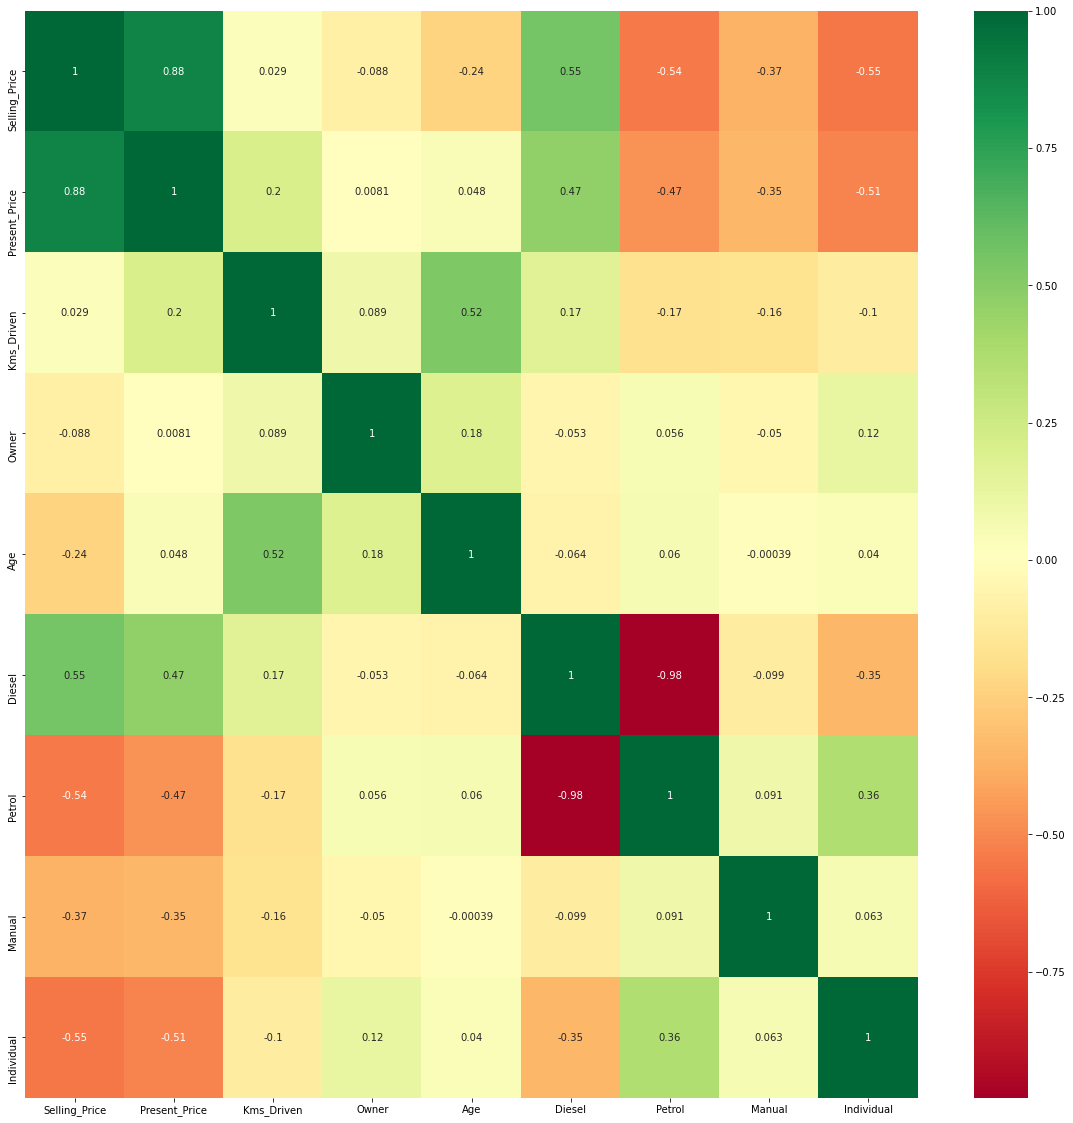

In [27]:
cor = final.corr()
top = cor.index
plt.figure(figsize = (20,20))
sns.heatmap(final[top].corr(), annot = True, cmap = 'RdYlGn')

In [28]:
x = final.drop('Selling_Price', axis = 1)
y =final['Selling_Price']

In [29]:
x.shape,y.shape

((301, 8), (301,))

In [30]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(x,y)
print(ext.feature_importances_)

[0.34915299 0.04049612 0.00037897 0.07632236 0.23867117 0.01345224
 0.1507933  0.13073285]


<AxesSubplot:>

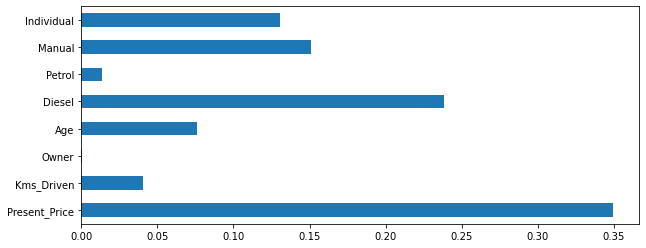

In [31]:
#plotting
plt.figure(figsize = (10,4))
fimpo = pd.Series(ext.feature_importances_, index = x.columns)
fimpo.plot(kind = 'barh')


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [34]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [1.0,2,3,5,10,14]
min_samples_leaf = [1, 2,3,4,6,8]
cri = ["mse", "mae"]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion': cri}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1.0, 2, 3, 5, 10, 14], 'min_samples_leaf': [1, 2, 3, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [35]:
rcv=RandomizedSearchCV(estimator=rfr, param_distributions=random_grid, n_iter=100,cv=3,verbose=2,
                               random_state=100, n_jobs=-1)

In [36]:
rcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 6, 8],
                                        'min_samples_split': [1.0, 2, 3, 5, 10,
                                                              14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   ra

In [37]:
y_pred = rcv.predict(x_test)

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

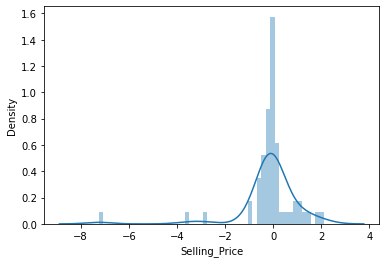

In [38]:
sns.distplot(y_test-y_pred)

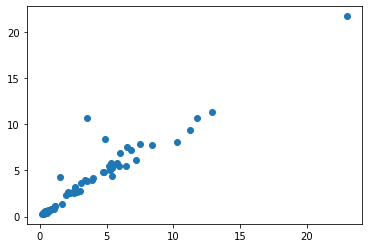

In [39]:
plt.scatter(y_test,y_pred)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
print(mean_squared_error(y_test,y_pred))

1.5462636976222615


In [42]:
print(r2_score(y_test,y_pred))

0.9008333310177093


In [45]:
import pickle
file= open('rf_model.pkl', 'wb')

pickle.dump(rcv, file)

* step 1: Freeze the rquirement in a requirement file. Command promp--> go the file location--> pip freeze > requirement.txt
* step 2: Creating the front end app.py (use spyder) 
                                            pip install requests, flast and jsonify
* step 3 : Create an Html page to gather information and shoe result                    

In [44]:
x.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Age', 'Diesel', 'Petrol',
       'Manual', 'Individual'],
      dtype='object')